In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from utils.data_prep_utils import DATES
from utils.train_utils import prep_data_train_val_test, show_sample

In [3]:
labels = ['zeev', 'or', 'ron', 'aviya', 'felix']

In [4]:
x_train, x_valid, x_test, y_train, y_valid, y_test = prep_data_train_val_test(DATES, labels,
                                                                              frames_size=32, is_dim_3d=False)

100%|██████████| 3000/3000 [00:01<00:00, 1781.73it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 30000/30000 [00:13<00:00, 2199.24it/s]
0it [00:00, ?it/s]
100%|██████████| 22000/22000 [00:11<00:00, 1899.84it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 21000/21000 [00:11<00:00, 1798.70it/s]


In [61]:
# best_loaded = tf.keras.models.load_model('../models/[64, 5, 2, 0.4, 256, 0.4, 128, 0.4]_2019525_11_21.h5')
# test_predictions = best_loaded.predict(x_test)

In [5]:
best_loaded = tf.keras.models.load_model('../models/5_lbls_relu_[32, 300, 100, 0.2]_2019518_2_11.h5')
test_predictions = best_loaded.predict(x_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [69]:
acc = 0
total = 0
predicted_dict = {}

for lbl in labels:
    predicted_dict[lbl] = []

for i, lbl in enumerate(y_test):
#     if lbl != 1:
        total += 1
        predicted_dict[labels[lbl]].append(test_predictions[i])
        if np.argmax(test_predictions[i]) == lbl:
            acc += 1
#     else:
#         print(lbl)
print('acc: ', (acc/total*100))

acc:  92.22535211267605


### plotting

In [70]:
test_predictions.shape

(14200, 5)

In [98]:
def plot_graph(test_predictions, labels, title):
    # rows = num_of_pics; cols = array_of_preds(labels)
    data = test_predictions

    x = np.arange(data.shape[0])
    dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
    d = 1./(data.shape[1]+2.)

    fig, ax=plt.subplots()
    for i in range(data.shape[1]):
        ax.bar(x,data[:,i], width=d, label="label {}".format(labels[i]))

    plt.xticks(np.arange(data.shape[0]),[i for i in range(test_predictions.shape[0])])
    plt.title("{0}'s Graph".format(lbl))
    plt.xlabel("number of pictures")
    plt.ylabel("output of prediction")
    plt.legend(framealpha=1).draggable()
    plt.gcf().set_size_inches(15, 5, forward=True)
    plt.show()

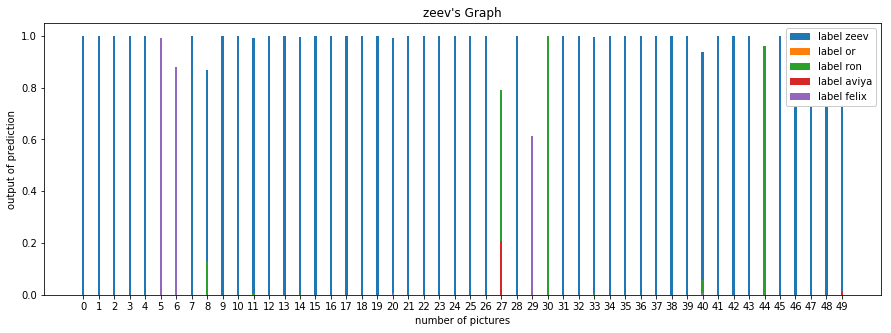

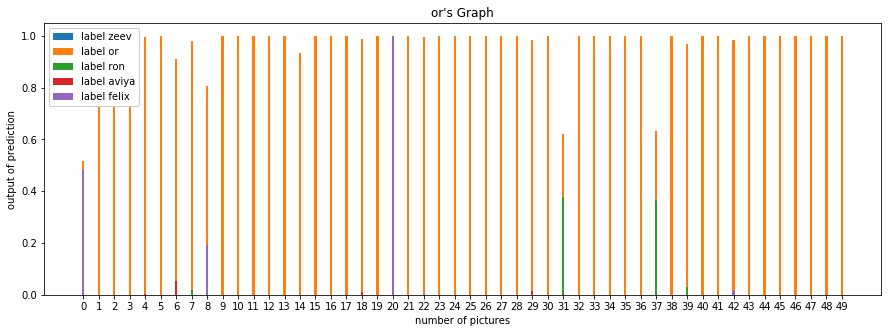

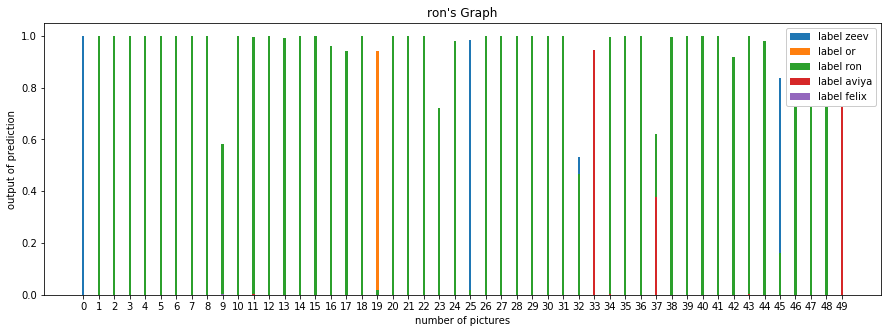

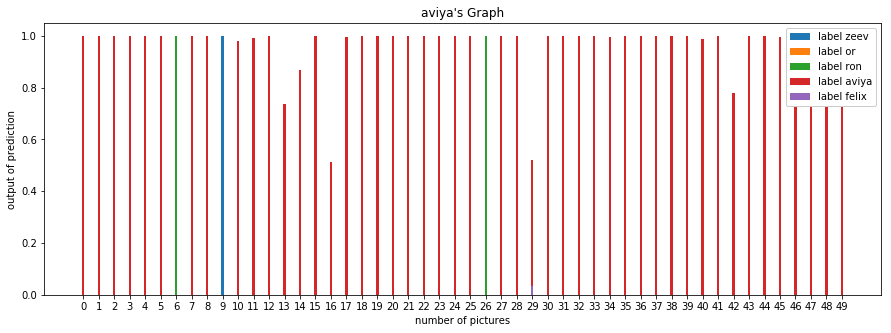

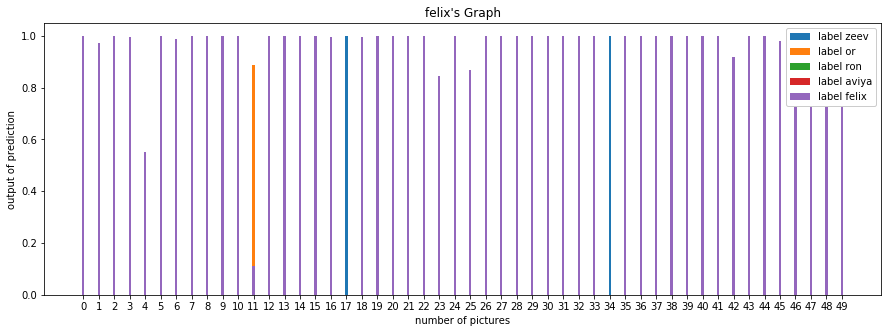

In [99]:
for lbl, val in predicted_dict.items():
    np.random.shuffle(val)
    plot_graph(np.array(val[:50]), labels, lbl)

## Auto-Cross Graph‏

In [8]:
def plot_auto_cross_graph(x_test, y_test, labels):

    test_predictions = best_loaded.predict(x_test)
    total            = 0
    predicted_dict   = {}
    person_total     = {}
    predicted_total  = {}

    for lbl in labels:
        person_total[lbl]    = 0

        predicted_dict[lbl]  = {"auto": 0,"cross": 0,"max_auto": 0,"min_auto": 1,\
                               "max_cross": 0,"min_cross": 1}
       
    predicted_total["total"] = {"auto": 0,"cross": 0,"max_auto": 0,"min_auto": 1,\
                               "max_cross": 0,"min_cross": 1}
    for i, lbl in enumerate(y_test):
            total += 1
            auto_value  = test_predictions[i][lbl]
            cross_value = np.sum(test_predictions[i]) - test_predictions[i][lbl]

            person_total[labels[lbl]] +=1
            predicted_dict[labels[lbl]]["auto"] += auto_value
            predicted_dict[labels[lbl]]["cross"] += cross_value

            if predicted_dict[labels[lbl]]["max_auto"] < auto_value :
                predicted_dict[labels[lbl]]["max_auto"] = auto_value

            if predicted_dict[labels[lbl]]["max_cross"] < cross_value :
                predicted_dict[labels[lbl]]["max_cross"] = cross_value

            if predicted_dict[labels[lbl]]["min_auto"] > auto_value :
                predicted_dict[labels[lbl]]["min_auto"] = auto_value

            if predicted_dict[labels[lbl]]["min_cross"] > cross_value :
                predicted_dict[labels[lbl]]["min_cross"] = cross_value            

    for k,v in predicted_dict.items():
        predicted_total["total"]["auto"]  += v["auto"]
        predicted_total["total"]["cross"] += v["cross"]

        if predicted_total["total"]["max_auto"]  < v["max_auto"] :
            predicted_total["total"]["max_auto"] = v["max_auto"]

        if predicted_total["total"]["max_cross"]  < v["max_cross"]  :
            predicted_total["total"]["max_cross"] = v["max_cross"]

        if predicted_total["total"]["min_auto"]  > v["min_auto"] :
            predicted_total["total"]["min_auto"] = v["min_auto"]

        if predicted_total["total"]["min_cross"]  > v["min_cross"] :
            predicted_total["total"]["min_cross"] = v["min_cross"]  


        v["auto"]  /= person_total[k]
        v["cross"] /= person_total[k]

    predicted_total["total"]["auto"]  /= total
    predicted_total["total"]["cross"]  /= total

    z= predicted_dict.copy()
    z.update(predicted_total)
    return z
dict_final_data = plot_auto_cross_graph(x_test, y_test, labels)

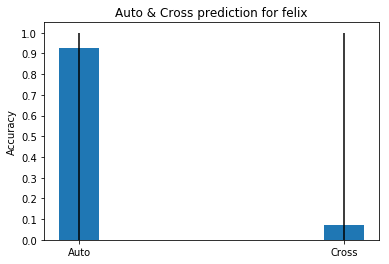

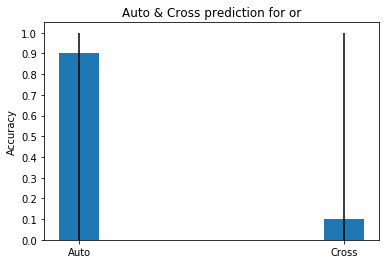

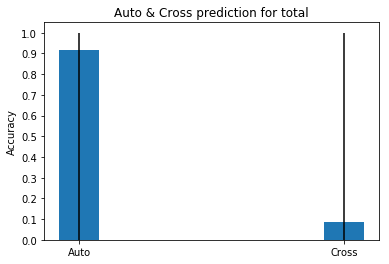

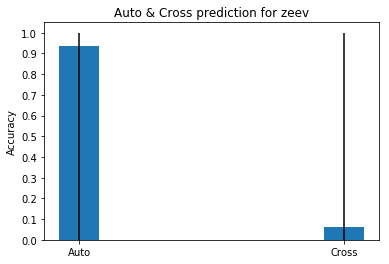

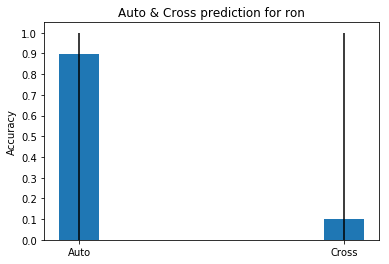

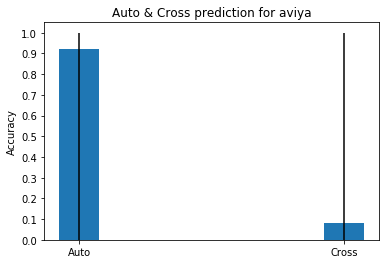

In [9]:
def plot_auto_cross_graph(sample_name,dict_list):
   
    ind     = np.arange(2)
    width   = 0.15
    xticks  = ["Auto", "Cross"]
    y       = [dict_list["auto"],dict_list["cross"]]    
    fig, ax = plt.subplots()  
    ax.bar(ind,y, width=width, yerr=[[abs(dict_list["min_auto"]-y[0]),abs(dict_list["min_cross"]-y[1])],\
                                     [abs(dict_list["max_auto"]-y[0]),abs(dict_list["max_cross"]-y[1])]])        
       
    plt.title('Auto & Cross prediction for {}'.format(sample_name))  
    plt.xticks(ind, xticks)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.ylabel("Accuracy")
    plt.show()

for k,v in dict_final_data.items():
    plot_auto_cross_graph(k,v)